b2210356088 Mustafa EGE 

In [96]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [97]:
personality_df = pd.read_csv('16P.csv',encoding='latin1')
personality_df = personality_df.drop(columns='Response Id')

In [98]:
personality_types_dic = {
'ESTJ': 0,
'ENTJ': 1,
'ESFJ': 2,
'ENFJ': 3,
'ISTJ': 4,
'ISFJ': 5,
'INTJ': 6,
'INFJ': 7,
'ESTP': 8,
'ESFP': 9,
'ENTP': 10,
'ENFP': 11,
'ISTP': 12,
'ISFP': 13,
'INTP': 14,
'INFP': 15}

personality_df = personality_df.replace(personality_types_dic)

personality_np = np.array(personality_df)

In [99]:
# 5-fold cross validation
def fold_cross(array,nth_fold):
    nth_fold -= 1
    splittedarrs = (np.array_split(array, 5))
    chosen_arr = splittedarrs[nth_fold] #test case
    if nth_fold == 0:
        secondpart = np.concatenate(splittedarrs[nth_fold+1:])
        rest_arr = secondpart # train case
    elif nth_fold == 4:
        firstpart = np.concatenate(splittedarrs[:nth_fold])
        rest_arr = firstpart # train case
    else:
        firstpart = np.concatenate(splittedarrs[:nth_fold])
        secondpart = np.concatenate(splittedarrs[nth_fold+1:])
        rest_arr = np.concatenate((firstpart,secondpart)) # train case

    x_train, y_train = rest_arr[:,:60], rest_arr[:,-1]
    x_test, y_test = chosen_arr[:,:60], chosen_arr[:,-1]
    return x_train,y_train,x_test,y_test

In [100]:
def compute_distances(x_train,x_test):
    x2 = np.sum(np.square(x_test), axis=1)
    y2 = np.sum(np.square(x_train), axis=1)
    dot_product = 2 * np.dot(x_test, x_train.T)
    distance = np.sqrt(x2[:, np.newaxis] - dot_product + y2)
    return distance

def knn(x_train, y_train, x_test, k):
    distances = compute_distances(x_train,x_test)
    nearest_indices = np.argsort(distances)
    nearest_items = y_train[nearest_indices[:,:k]]
    def mostcommon(arr):
        return Counter(arr).most_common()[0][0]
    prediction = np.apply_along_axis(mostcommon,1,nearest_items)
    return prediction

In [101]:
def accuracy(truth, pred):
    return np.mean(truth == pred)

def precision(truth, pred):
    precision = 0 
    for i in range(16): # for each personality type
        true_positives = np.sum(np.logical_and(pred == truth, pred == i), axis=0)
        false_positives = np.sum(np.logical_and(pred != truth, pred == i), axis=0)
        precision += true_positives / (true_positives + false_positives)
    precision /= 16
    return precision

def recall(truth, pred):
    recall = 0
    for i in range(16): # for each personality type
        true_positives = np.sum(np.logical_and(pred == truth, pred == i), axis=0)
        false_negatives = np.sum(np.logical_and(pred != truth, truth == i), axis=0)
        recall += true_positives / (true_positives + false_negatives)
    recall /= 16
    return recall

def record_data(accdata,precdata,recdata):
    acc_data.append(accdata)
    prec_data.append(precdata)
    rec_data.append(recdata)

In [102]:
# min-max scaling
forscalenumbers = personality_np[:,:-1]
forscaletypes = np.expand_dims(personality_np[:,-1],1)
scaled_numbers = (forscalenumbers - np.min(forscalenumbers)) / (np.max(forscalenumbers) - np.min(forscalenumbers))
scaled_personality_np = np.concatenate((scaled_numbers,forscaletypes),axis=1)

------------FOLD 1------------

for k = 1
---------
without feature normalization
Accuracy:  0.9786666666666667
Precision:  0.9786650790937739
Recall:  0.9786130922017358

with feature normalization
Accuracy:  0.9788333333333333
Precision:  0.9788338908395773
Recall:  0.9787865225129329

for k = 3
---------
without feature normalization
Accuracy:  0.98875
Precision:  0.9888118406708534
Recall:  0.9887116298468387

with feature normalization
Accuracy:  0.9886666666666667
Precision:  0.9887305688010263
Recall:  0.9886265958332332

for k = 5
---------
without feature normalization
Accuracy:  0.9894166666666667
Precision:  0.9894606720943213
Recall:  0.9893797128620911

with feature normalization
Accuracy:  0.9894166666666667
Precision:  0.9894570879035675
Recall:  0.9893795970119363

for k = 7
---------
without feature normalization
Accuracy:  0.9896666666666667
Precision:  0.9897059569442155
Recall:  0.9896333333593121

with feature normalization
Accuracy:  0.9896666666666667
Precision: 

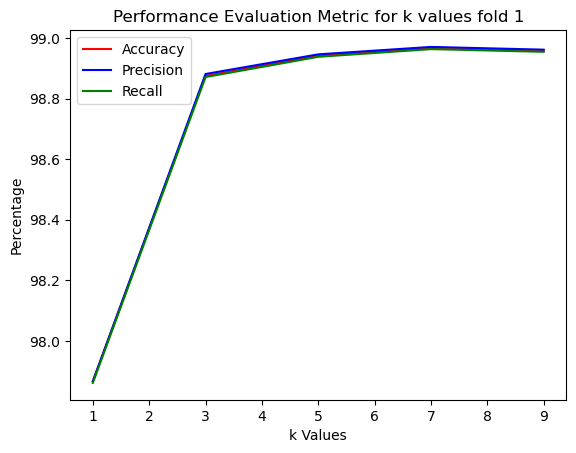

------------FOLD 2------------

for k = 1
---------
without feature normalization
Accuracy:  0.9768333333333333
Precision:  0.9768596257116923
Recall:  0.9768243513136036

with feature normalization
Accuracy:  0.977
Precision:  0.9769981629921828
Recall:  0.9769702883915556

for k = 3
---------
without feature normalization
Accuracy:  0.98875
Precision:  0.9887169391342778
Recall:  0.9887654992214195

with feature normalization
Accuracy:  0.9888333333333333
Precision:  0.9888020919840492
Recall:  0.9888452186091746

for k = 5
---------
without feature normalization
Accuracy:  0.9891666666666666
Precision:  0.9891507824590609
Recall:  0.9891643035033381

with feature normalization
Accuracy:  0.989
Precision:  0.9889891067913978
Recall:  0.9889955606083022

for k = 7
---------
without feature normalization
Accuracy:  0.9894166666666667
Precision:  0.9893962738742985
Recall:  0.9894262306664395

with feature normalization
Accuracy:  0.9893333333333333
Precision:  0.9893102445326416
Recall

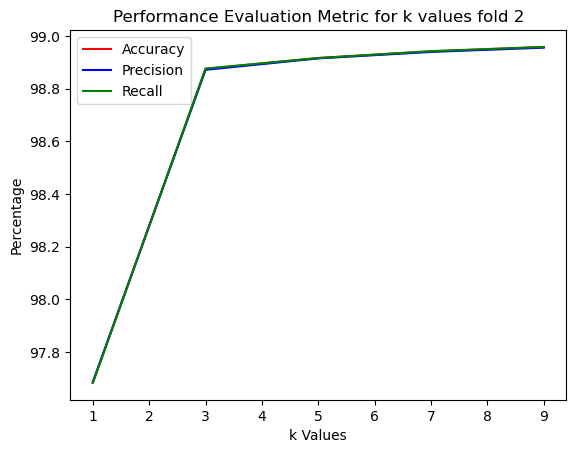

------------FOLD 3------------

for k = 1
---------
without feature normalization
Accuracy:  0.9768333333333333
Precision:  0.976886150833187
Recall:  0.976863112242346

with feature normalization
Accuracy:  0.97725
Precision:  0.9773121059706487
Recall:  0.977296371315472

for k = 3
---------
without feature normalization
Accuracy:  0.989
Precision:  0.9890396257840732
Recall:  0.989040853942466

with feature normalization
Accuracy:  0.989
Precision:  0.9890459741870914
Recall:  0.9890386431339114

for k = 5
---------
without feature normalization
Accuracy:  0.9893333333333333
Precision:  0.9893674232024661
Recall:  0.9893671971144008

with feature normalization
Accuracy:  0.9893333333333333
Precision:  0.989372189945719
Recall:  0.9893715517746581

for k = 7
---------
without feature normalization
Accuracy:  0.98975
Precision:  0.9897794256409921
Recall:  0.9897860461843534

with feature normalization
Accuracy:  0.98975
Precision:  0.9897836937846075
Recall:  0.9897898504263223

for 

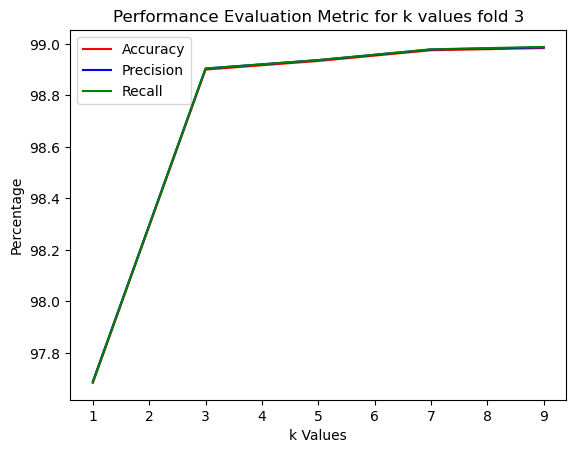

------------FOLD 4------------

for k = 1
---------
without feature normalization
Accuracy:  0.9788333333333333
Precision:  0.9788819344080226
Recall:  0.978838510886218

with feature normalization
Accuracy:  0.979
Precision:  0.9790387333436789
Recall:  0.9790044124963647

for k = 3
---------
without feature normalization
Accuracy:  0.9875833333333334
Precision:  0.9876060322036853
Recall:  0.9875768745584956

with feature normalization
Accuracy:  0.98775
Precision:  0.9877770818368403
Recall:  0.9877359654675865

for k = 5
---------
without feature normalization
Accuracy:  0.9886666666666667
Precision:  0.9886928025695548
Recall:  0.9886601161934211

with feature normalization
Accuracy:  0.98875
Precision:  0.988779219208095
Recall:  0.9887358737691787

for k = 7
---------
without feature normalization
Accuracy:  0.9886666666666667
Precision:  0.9886809104944942
Recall:  0.9886657763003783

with feature normalization
Accuracy:  0.9888333333333333
Precision:  0.9888524088488525
Recall

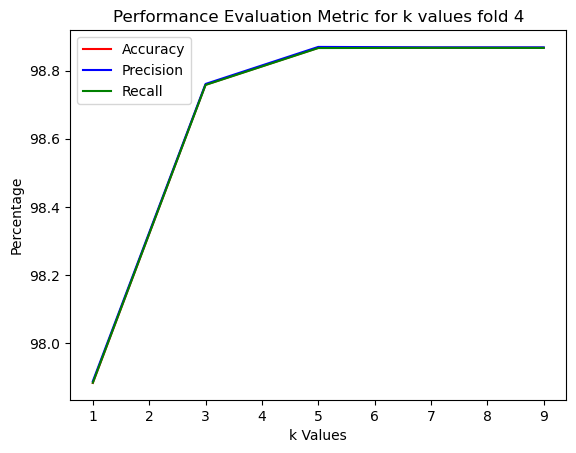

------------FOLD 5------------

for k = 1
---------
without feature normalization
Accuracy:  0.9775814651220935
Precision:  0.9775490168820061
Recall:  0.9775348412685985

with feature normalization
Accuracy:  0.9782481873489457
Precision:  0.9782178465997771
Recall:  0.9782097910857801

for k = 3
---------
without feature normalization
Accuracy:  0.9882490207517293
Precision:  0.9882406725852245
Recall:  0.9882137457296719

with feature normalization
Accuracy:  0.9880823401950163
Precision:  0.9880742167322221
Recall:  0.9880496165751997

for k = 5
---------
without feature normalization
Accuracy:  0.988832402700225
Precision:  0.9888269990785715
Recall:  0.9888119474623345

with feature normalization
Accuracy:  0.988832402700225
Precision:  0.9888223889279684
Recall:  0.9888130675661366

for k = 7
---------
without feature normalization
Accuracy:  0.9889990832569381
Precision:  0.9889912773764763
Recall:  0.9889770522364538

with feature normalization
Accuracy:  0.9890824235352946
Pr

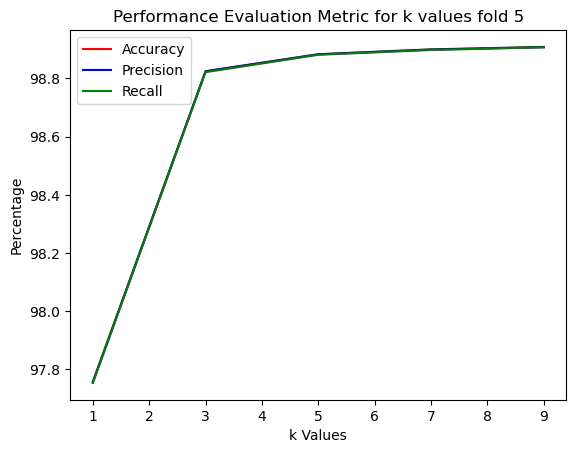

In [103]:
for i in range(1,6):
    print(f'FOLD {i}'.center(30,'-'))
    without_scale = fold_cross(personality_np,i)
    with_scale = fold_cross(scaled_personality_np,i)
    acc_data,prec_data,rec_data = [],[],[]

    for k in [1,3,5,7,9]:
        normalization_index = 0

        print(f'\nfor k = {k}')
        print('---------')
        for data_type in [without_scale,with_scale]:
            normalization_index+= 1
            personality_numbers_train, personality_type_train, personality_numbers_test,personality_type_test = data_type
            # predicted values by using knn
            predicted = knn(personality_numbers_train,personality_type_train,personality_numbers_test,k)

            truth = personality_type_test # true labels
            pred = predicted # predicted labels
            
            acc = accuracy(truth, pred)
            prec = precision(truth, pred)
            rec = recall(truth, pred)

            if normalization_index == 1:
                print('without feature normalization')
                record_data(acc*100,prec*100,rec*100)
            elif normalization_index == 2:
                print('\nwith feature normalization')
   
            print("Accuracy: ", acc)
            print("Precision: ", prec)
            print("Recall: ", rec)

    x = [1,3,5,7,9]
    y = acc_data
    plt.plot(x,y,c='r',label='Accuracy')

    y = prec_data
    plt.plot(x,y,c='b',label='Precision')

    y = rec_data
    plt.plot(x,y,c='g',label='Recall')
    plt.title(f"Performance Evaluation Metric for k values fold {i}")
    plt.xlabel("k Values")
    plt.ylabel("Percentage")
    plt.legend()
    plt.show()

# Error Analysis for Classification

## Effect of Neighbor Number (k)
Effect of the neighbor value (k) can be seen from the previous graphs. Graphs shows how accuracy, precision and recall values changes according to the neighbor k value. 
We can see that when k increase all of the performance metric evaluation values increase as well.  
Especially there is a big difference between k=1 and k=3. When we increase the k value from 1 to 3 accuracy of prediction on the personality types increase about 1%. 
Between k=3 and k=5, there is still an increase on accuracy and other values but it is not as visible as 1-3.
After k=5 it is quite hard to see the increase on performance metric evaluation values and it is nearly same with k=7 and k=9.
#### Accuracy, Precision and Recall.
With the effect of neighbor number (k); accuracy, precision, and recall values don't differ from each other that much. In all of the graphs we can see 3 values align with each other and even in most graphs we can't see the 3 lines of values.

In order to to get proper values and good estimation for the graphs, I used the necessary part from the code again with some adjustments. Takes more time but it shows better and reliable result.

## Effect of K-Fold
To see the effect of the k-fold cross validation, we need to to choose the neighbor value (k) a certain number and we need to choose of the feature normalizations. 
I chose k=3 to since it is the average and usable value and used the data without feature normalization. 
From the graph below, we can see that with the 5-fold cross validation, for each fold the accuracy values changes without an order.
In the 3rd fold the accuracy values are the highest and in the 4th one they are the lowest. The maximum change betweenthem is around 0.15%
Also, we can see accuracy, precision and recall values differ from each other in this graph.

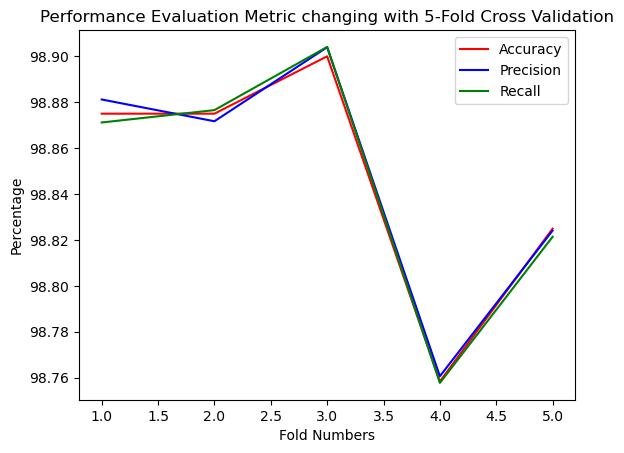

In [108]:
acc_data,prec_data,rec_data = [],[],[]
for i in range(1,6):
    without_scale = fold_cross(personality_np,i)
    personality_numbers_train, personality_type_train, personality_numbers_test,personality_type_test = without_scale

    k = 3
    predicted = knn(personality_numbers_train,personality_type_train,personality_numbers_test,k)

    truth = personality_type_test # true labels
    pred = predicted # predicted labels
    
    acc = accuracy(truth, pred)
    prec = precision(truth, pred)
    rec = recall(truth, pred)
    record_data(acc*100,prec*100,rec*100)   

x = range(1,6)
y = acc_data
plt.plot(x,y,c='r',label='Accuracy')

y = prec_data
plt.plot(x,y,c='b',label='Precision')

y = rec_data
plt.plot(x,y,c='g',label='Recall')

plt.title(f"Performance Evaluation Metric changing with 5-Fold Cross Validation")
plt.xlabel("Fold Numbers")
plt.ylabel("Percentage")
plt.legend()
plt.show()

## Effect of Normalization
To see the change in the performance evaluation values, we need to choose a certain neighbor number (k) and choose a certain fold. In this graph I chose k=3 and the first fold since they are average values.
From the graph, we can see that, with the feature normalization the accuracy, precision and recall decrease by the same amount. However, the graph shows the data quite in detail because the decrease is so less. It is around 0.01% so feature normalizaion doesn't affect the result that much in our example.
We also can see the difference between accuracy, precision and recall in detail in this graph.

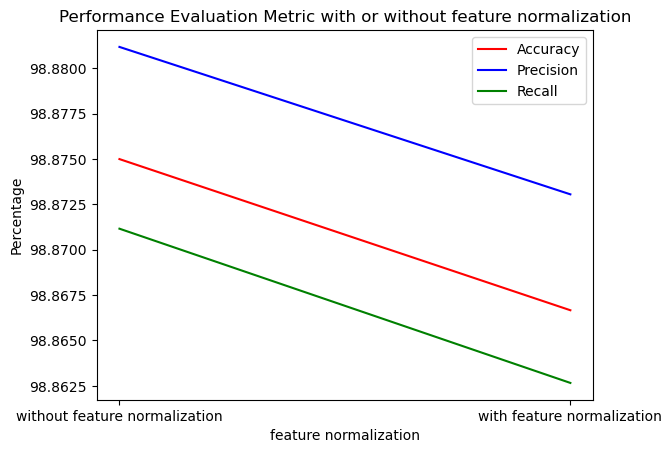

In [109]:
without_scale = fold_cross(personality_np,1)
with_scale = fold_cross(scaled_personality_np,1)
acc_data,prec_data,rec_data = [],[],[]
normalization_index = 0
feature_data = []
for data_type in [without_scale,with_scale]:
    normalization_index+= 1
    personality_numbers_train, personality_type_train, personality_numbers_test,personality_type_test = data_type
    k=3
    predicted = knn(personality_numbers_train,personality_type_train,personality_numbers_test,k)
    truth = personality_type_test # true labels
    pred = predicted # predicted labels
    acc = accuracy(truth, pred)
    prec = precision(truth, pred)
    rec = recall(truth, pred)

    if normalization_index == 1:
        record_data(acc*100,prec*100,rec*100)
    elif normalization_index == 2:
        record_data(acc*100,prec*100,rec*100)

x = ['without feature normalization','with feature normalization']
y = acc_data
plt.plot(x,y,c='r',label='Accuracy')

y = prec_data
plt.plot(x,y,c='b',label='Precision')

y = rec_data
plt.plot(x,y,c='g',label='Recall')
plt.title(f"Performance Evaluation Metric with or without feature normalization")
plt.xlabel("feature normalization")
plt.ylabel("Percentage")
plt.legend()
plt.show()

## Effect of Algorithm 
In my algorithm, program finds the nearest neigbors of test data, and decides about the result according to these neighbors. 
For calculating the distance between two points I used the Euclidian Distance. If we use another formula or approach to find the distance we would get different results and different accuracies.
For the nearest neighbors I used KNN algorithm, if we use weighted KNN algorithm, the accuracy would probably be higher. 
To find the accuracy, precision and recall I calculated true positive, false positive and false negative values for each personality type. Then I calculared the macro average of all these values. If we use another approach the results would be completely different.

## Misclassified Samples
From the information below, we see that some personality types were mispredicted much more than the others. This probably means these personality types' independent variables are close to the others, so our program mispredict these types as the closest neighbor type. 

In [140]:
inverted_pers_dic = {v: k for k, v in personality_types_dic.items()}
classification = (truth == pred)
true_personalities = truth[classification == False]
wrong_predictions = pred[classification == False]

true_personalities = [inverted_pers_dic[i] for i in true_personalities]
wrong_predictions = [inverted_pers_dic[i] for i in wrong_predictions]
print('Most Commonly Mispredicted Personality Types:')
common_wrong = Counter(wrong_predictions).most_common()
for i in (dict(common_wrong)):
    print(i,dict(Counter(wrong_predictions))[i],'times')


Most Commonly Mispredicted Personality Types:
ESFJ 15 times
INFJ 14 times
ISFJ 13 times
ENTJ 12 times
ISTJ 10 times
ENFJ 10 times
ISTP 9 times
ESTJ 9 times
ISFP 8 times
ESTP 8 times
ESFP 8 times
INTP 6 times
ENFP 5 times
INFP 5 times
ENTP 2 times
INTJ 2 times
